In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-05-13 12:56:36.256369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ltc = pd.read_csv('data_with_blockchain_ltc.csv')

In [3]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1824 non-null   int64  
 1   id                               1824 non-null   int64  
 2   symbol                           1824 non-null   object 
 3   date                             1824 non-null   object 
 4   zero_balance_addresses_all_time  1824 non-null   int64  
 5   unique_addresses_all_time        1824 non-null   int64  
 6   new_addresses                    1824 non-null   int64  
 7   active_addresses                 1824 non-null   int64  
 8   transaction_count                1824 non-null   int64  
 9   transaction_count_all_time       1824 non-null   int64  
 10  large_transaction_count          1824 non-null   int64  
 11  average_transaction_value        1824 non-null   float64
 12  block_height        

In [4]:
ltc.head()

,Unnamed: 0,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,...,hashrate,difficulty,block_time,block_size,current_supply,Open,High,Low,Close,Volume
0,0,3808,LTC,2018-05-14,27177510,30067934,43239,118459,32663,24295958,...,292.212421,1.026746e+07,150.912127,37054,5.653938e+07,144.19,152.95,134.19,147.42,171489.17098
1,1,3808,LTC,2018-05-15,27212065,30110098,42164,115177,32201,24328159,...,297.500801,1.042096e+07,150.445614,33859,5.655366e+07,147.10,149.67,136.91,139.35,105112.90271
2,2,3808,LTC,2018-05-16,27248103,30151999,41901,114405,32030,24360189,...,319.597568,1.042096e+07,140.043902,31292,5.656906e+07,139.34,140.86,133.50,138.92,70852.18798
3,3,3808,LTC,2018-05-17,27283385,30192770,40771,113345,31651,24391840,...,305.735777,1.046912e+07,147.069847,32887,5.658376e+07,138.91,141.50,131.00,132.31,58209.58480
4,4,3808,LTC,2018-05-18,27321475,30232999,40229,117325,31002,24422842,...,310.914705,1.063547e+07,146.918089,32358,5.659843e+07,132.07,137.49,128.00,135.95,66556.79304


In [5]:
ltc.columns

Index(['Unnamed: 0', 'id', 'symbol', 'date', 'zero_balance_addresses_all_time',
       'unique_addresses_all_time', 'new_addresses', 'active_addresses',
       'transaction_count', 'transaction_count_all_time',
       'large_transaction_count', 'average_transaction_value', 'block_height',
       'hashrate', 'difficulty', 'block_time', 'block_size', 'current_supply',
       'Open', 'High', 'Low', 'Close', 'Volume'],
      dtype='object')

In [6]:
ltc.drop(['large_transaction_count','average_transaction_value','active_addresses','block_time','transaction_count',
          'new_addresses','Volume','block_size','Unnamed: 0','id','symbol']
         ,axis=1,inplace=True)
ltc

,date,zero_balance_addresses_all_time,unique_addresses_all_time,transaction_count_all_time,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close
0,2018-05-14,27177510,30067934,24295958,1421652,292.212421,1.026746e+07,5.653938e+07,144.19,152.95,134.19,147.42
1,2018-05-15,27212065,30110098,24328159,1422223,297.500801,1.042096e+07,5.655366e+07,147.10,149.67,136.91,139.35
2,2018-05-16,27248103,30151999,24360189,1422839,319.597568,1.042096e+07,5.656906e+07,139.34,140.86,133.50,138.92
3,2018-05-17,27283385,30192770,24391840,1423427,305.735777,1.046912e+07,5.658376e+07,138.91,141.50,131.00,132.31
4,2018-05-18,27321475,30232999,24422842,1424014,310.914705,1.063547e+07,5.659843e+07,132.07,137.49,128.00,135.95
...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2023-05-07,188318527,195876634,153383144,2469852,638.145457,2.448948e+07,7.287564e+07,83.27,84.69,82.93,83.42
1820,2023-05-08,188839571,196473654,153909527,2470388,646.147954,2.426070e+07,7.288209e+07,83.41,85.25,75.20,77.71
1821,2023-05-09,189418721,197153699,154486762,2470915,638.430554,2.426070e+07,7.288911e+07,77.72,80.10,77.31,79.90
1822,2023-05-10,190015207,197847358,155072177,2471494,698.380850,2.426070e+07,7.289635e+07,79.91,82.04,77.12,80.93


In [7]:
target = ltc['Close'].values

In [8]:
ltc.set_index('date', inplace=True)
ltc.head()

,zero_balance_addresses_all_time,unique_addresses_all_time,transaction_count_all_time,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close
date,,,,,,,,,,,
2018-05-14,27177510,30067934,24295958,1421652,292.212421,1.026746e+07,5.653938e+07,144.19,152.95,134.19,147.42
2018-05-15,27212065,30110098,24328159,1422223,297.500801,1.042096e+07,5.655366e+07,147.10,149.67,136.91,139.35
2018-05-16,27248103,30151999,24360189,1422839,319.597568,1.042096e+07,5.656906e+07,139.34,140.86,133.50,138.92
2018-05-17,27283385,30192770,24391840,1423427,305.735777,1.046912e+07,5.658376e+07,138.91,141.50,131.00,132.31
2018-05-18,27321475,30232999,24422842,1424014,310.914705,1.063547e+07,5.659843e+07,132.07,137.49,128.00,135.95


In [10]:
ltc = ltc.reset_index(drop=True)
ltc.head()

,zero_balance_addresses_all_time,unique_addresses_all_time,transaction_count_all_time,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close
0,27177510,30067934,24295958,1421652,292.212421,1.026746e+07,5.653938e+07,144.19,152.95,134.19,147.42
1,27212065,30110098,24328159,1422223,297.500801,1.042096e+07,5.655366e+07,147.10,149.67,136.91,139.35
2,27248103,30151999,24360189,1422839,319.597568,1.042096e+07,5.656906e+07,139.34,140.86,133.50,138.92
3,27283385,30192770,24391840,1423427,305.735777,1.046912e+07,5.658376e+07,138.91,141.50,131.00,132.31
4,27321475,30232999,24422842,1424014,310.914705,1.063547e+07,5.659843e+07,132.07,137.49,128.00,135.95


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
ltc_scaled = scaler.fit_transform(ltc)
ltc_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.56182229e-01, ...,
        3.31485900e-01, 3.46690219e-01, 3.40919061e-01],
       [2.11561566e-04, 2.50432665e-04, 1.56389227e-01, ...,
        3.23069818e-01, 3.55119623e-01, 3.18792498e-01],
       [4.32202738e-04, 4.99303244e-04, 1.56595126e-01, ...,
        3.00464424e-01, 3.44551878e-01, 3.17613512e-01],
       ...,
       [9.93315138e-01, 9.92404265e-01, 9.93090570e-01, ...,
        1.44561620e-01, 1.70416512e-01, 1.55790744e-01],
       [9.96967099e-01, 9.96524246e-01, 9.96853806e-01, ...,
        1.49539425e-01, 1.69827693e-01, 1.58614828e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.49359813e-01, 1.73701500e-01, 1.58477736e-01]])

In [13]:
ltc_scaled_df = pd.DataFrame(ltc_scaled, columns=ltc.columns)
ltc_scaled_df

,zero_balance_addresses_all_time,unique_addresses_all_time,transaction_count_all_time,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close
0,0.000000,0.000000,0.156182,0.575089,0.367522,0.401128,0.000000,0.332127,0.331486,0.346690,0.340919
1,0.000212,0.000250,0.156389,0.575320,0.374174,0.407126,0.000872,0.340106,0.323070,0.355120,0.318792
2,0.000432,0.000499,0.156595,0.575569,0.401965,0.407126,0.001814,0.318829,0.300464,0.344552,0.317614
3,0.000648,0.000741,0.156799,0.575807,0.384531,0.409007,0.002712,0.317650,0.302107,0.336804,0.299490
4,0.000881,0.000980,0.156998,0.576044,0.391045,0.415506,0.003609,0.298895,0.291817,0.327507,0.309470
...,...,...,...,...,...,...,...,...,...,...,...
1819,0.986579,0.984819,0.985996,0.999108,0.802610,0.956754,0.998344,0.165090,0.156339,0.187833,0.165442
1820,0.989769,0.988365,0.989380,0.999325,0.812675,0.947816,0.998738,0.165474,0.157776,0.163878,0.149786
1821,0.993315,0.992404,0.993091,0.999538,0.802969,0.947816,0.999167,0.149873,0.144562,0.170417,0.155791
1822,0.996967,0.996524,0.996854,0.999773,0.878370,0.947816,0.999610,0.155877,0.149539,0.169828,0.158615


In [17]:
train_data, test_data = train_test_split(ltc_scaled_df, test_size=0.1, shuffle=False) 

In [18]:
def create_dataset(data, time_steps):
    print(f"Input data type: {type(data)}")
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        x = data[i:(i + time_steps), 1:]
        y = data[i + time_steps, 0] # Assuming the target variable (e.g. closing price) is the first column
        print(f"i: {i}, x shape: {x.shape}, y: {y}")
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [19]:
time_steps = 5 # Adjust this value depending on the desired sequence length
X_train, Y_train = create_dataset(train_data.values, time_steps)
X_test, Y_test = create_dataset(test_data.values, time_steps)

Input data type: <class 'numpy.ndarray'>
i: 0, x shape: (5, 10), y: 0.0010936670693816042
i: 1, x shape: (5, 10), y: 0.0013122266054265697
i: 2, x shape: (5, 10), y: 0.0015946801220353135
i: 3, x shape: (5, 10), y: 0.0018544499286029525
i: 4, x shape: (5, 10), y: 0.002171819828036048
i: 5, x shape: (5, 10), y: 0.0023937161041545363
i: 6, x shape: (5, 10), y: 0.0026182511600375824
i: 7, x shape: (5, 10), y: 0.002897465895914414
i: 8, x shape: (5, 10), y: 0.0031246213641854814
i: 9, x shape: (5, 10), y: 0.0033232522966720746
i: 10, x shape: (5, 10), y: 0.003553401647321014
i: 11, x shape: (5, 10), y: 0.0037439080769130217
i: 12, x shape: (5, 10), y: 0.003937487980847976
i: 13, x shape: (5, 10), y: 0.004102469879492254
i: 14, x shape: (5, 10), y: 0.004262725239903953
i: 15, x shape: (5, 10), y: 0.004378145834153496
i: 16, x shape: (5, 10), y: 0.004589780869238558
i: 17, x shape: (5, 10), y: 0.0047543219508456025
i: 18, x shape: (5, 10), y: 0.004915667108932681
i: 19, x shape: (5, 10), y: 

In [20]:
train_data

,zero_balance_addresses_all_time,unique_addresses_all_time,transaction_count_all_time,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close
0,0.000000,0.000000,0.156182,0.575089,0.367522,0.401128,0.000000,0.332127,0.331486,0.346690,0.340919
1,0.000212,0.000250,0.156389,0.575320,0.374174,0.407126,0.000872,0.340106,0.323070,0.355120,0.318792
2,0.000432,0.000499,0.156595,0.575569,0.401965,0.407126,0.001814,0.318829,0.300464,0.344552,0.317614
3,0.000648,0.000741,0.156799,0.575807,0.384531,0.409007,0.002712,0.317650,0.302107,0.336804,0.299490
4,0.000881,0.000980,0.156998,0.576044,0.391045,0.415506,0.003609,0.298895,0.291817,0.327507,0.309470
...,...,...,...,...,...,...,...,...,...,...,...
1636,0.833232,0.828941,0.857252,0.956278,0.677766,0.702993,0.917191,0.122097,0.123573,0.138806,0.126535
1637,0.833916,0.829605,0.857904,0.956518,0.666385,0.702993,0.917647,0.126676,0.121417,0.140108,0.123876
1638,0.834703,0.830302,0.858585,0.956756,0.680437,0.720187,0.918095,0.123934,0.127268,0.136017,0.121573
1639,0.835968,0.831066,0.859269,0.957000,0.701976,0.729138,0.918553,0.121631,0.115772,0.098302,0.095251


In [21]:
print(X_train.shape, Y_train.shape)

(1635, 5, 10) (1635,)


In [22]:
print(X_test.shape, Y_test.shape)

(177, 5, 10) (177,)


In [23]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the function to create the LSTM model
def create_model(optimizer='adam', units1=128, units2=64):
    model = Sequential()
    model.add(LSTM(units=units1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=units2, return_sequences=True))
    model.add(LSTM(units=64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor object
model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to search over
param_grid = {
    'optimizer': ['adamax', 'rmsprop', 'adam', 'sgd', 'nadam'],
    'units1': [64, 128, 256],
    'units2': [32, 64, 128]
    #'epochs':[2, 4, 16, 32, 64, 72, 128]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train, Y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_7702/1358354377.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
2023-05-13 13:00:24.162862: F ./tensorflow/core/lib/monitoring/counter.h:198] Check failed: 0 <= step (0 vs. -52858)Must not decrement cumulative metrics.
exception calling callback for <Future at 0x7fab0b606e30 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/joblib/parallel.py", line 360, in __call__
    self.parallel.dispatch_next()
  File "/Users/natalieqoursha/anaconda3/lib/python3

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6)}

In [24]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
52/52 [==============================] - 3s 13ms/step - loss: 0.0216
Epoch 2/15
52/52 [==============================] - 1s 12ms/step - loss: 1.9510e-04
Epoch 3/15
52/52 [==============================] - 1s 12ms/step - loss: 1.1735e-04
Epoch 4/15
52/52 [==============================] - 1s 12ms/step - loss: 7.8089e-05
Epoch 5/15
52/52 [==============================] - 1s 12ms/step - loss: 6.7075e-05
Epoch 6/15
52/52 [==============================] - 1s 12ms/step - loss: 4.6876e-05
Epoch 7/15
52/52 [==============================] - 1s 12ms/step - loss: 4.3104e-05
Epoch 8/15
52/52 [==============================] - 1s 12ms/step - loss: 3.5286e-05
Epoch 9/15
52/52 [==============================] - 1s 12ms/step - loss: 3.3862e-05
Epoch 10/15
52/52 [==============================] - 1s 13ms/step - loss: 3.5690e-05
Epoch 11/15
52/52 [==============================] - 1s 12ms/step - loss: 2.8628e-05
Epoch 12/15
52/52 [==============================] - 1s 12ms/step - loss: 3.03

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
# Compute the mean squared error between the predictions and the actual values
test_loss = mean_squared_error(Y_test, y_pred)

# Print the test loss
print("Test loss:", test_loss)

6/6 [==============================] - 1s 5ms/step
Test loss: 4.1002133771234234e-05


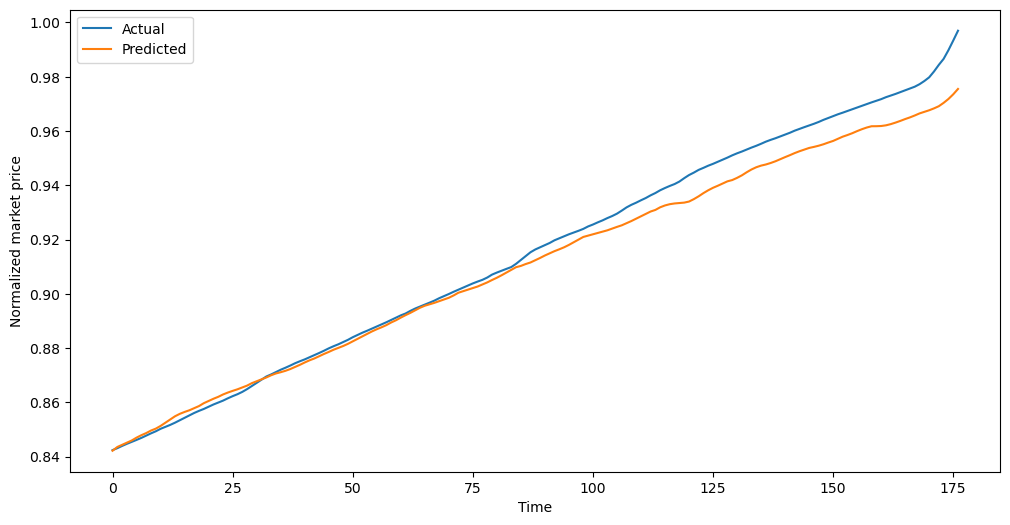

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.show()